# 多种梯度下降的方法

## 1. 准备二分类的数据

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

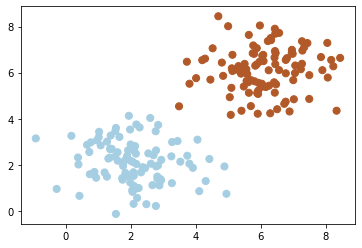

In [2]:
data = torch.ones(100,2)
x1 = torch.normal(2*data,1)
x2 = torch.normal(6*data,1)
y1 = torch.zeros(len(x1))
y2 = torch.ones(len(x2))
x = torch.cat((x1,x2),0)
y = torch.cat((y1,y2),0)

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap=plt.cm.Paired)

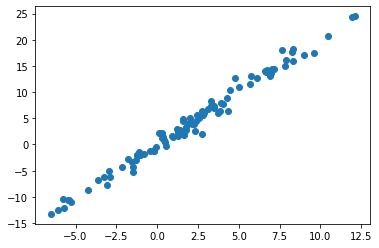

In [3]:
data = torch.ones(100)
x = torch.normal(2*data,4).reshape(-1,1)
y = torch.normal(2*x,1)
plt.scatter(x,y)

In [43]:
class Net(torch.nn.Module):
    def __init__(self,in_features,out_features):
        super(Net,self).__init__()
        self.feature = nn.Linear(in_features,30)
        self.out = nn.Linear(30,out_features)
        
    def forward(self,x):
        x = F.relu(self.feature(x))
        return self.out(x)


### 准备net和optimizer

In [49]:
net_sgd = Net(1,1)
net_momenturn = Net(1,1)
net_RMSprop = Net(1,1)
net_Adam = Net(1,1)
nets = [net_sgd, net_momenturn, net_RMSprop, net_Adam] # 

In [70]:
Epoch = 200
LR = 0.003
optim_sgd = torch.optim.SGD(net_sgd.parameters(),lr=LR)
optim_momenturn = torch.optim.SGD(net_momenturn.parameters(),lr=LR,momentum=0.8)
optim_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR)
optim_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR)
optims = [optim_sgd, optim_momenturn, optim_RMSprop, optim_Adam] # 

In [71]:
dataset = torch.utils.data.TensorDataset(x,y)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=20,shuffle=True)

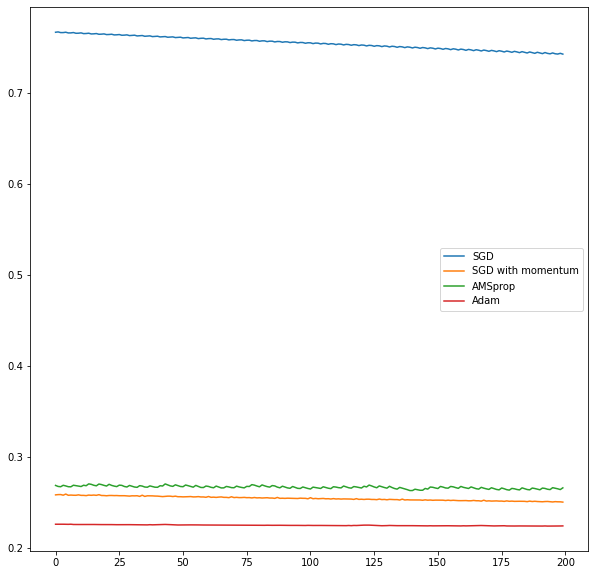

In [79]:
Method = ['SGD','SGD with momentum','AMSprop','Adam']
# loss_fn = torch.nn.CrossEntropyLoss()
loss_fn = torch.nn.MSELoss()

losses_hist = [[],[],[],[]]
for epoch in range(Epoch):
    for step,(x,y) in enumerate(dataloader):
        for net,optim,l_hist in zip(nets,optims,losses_hist):
            y_pred = net(x)
#             print(y_pred)
            loss = loss_fn(y_pred,y)
#             break
            optim.zero_grad()
            loss.backward()
            optim.step()
            l_hist.append(loss.item())
            
#             print('loss : ',loss.item())

plt.figure(figsize=(10,10))
for i,data in enumerate(losses_hist):
    plt.plot(data,label=Method[i])
plt.legend()

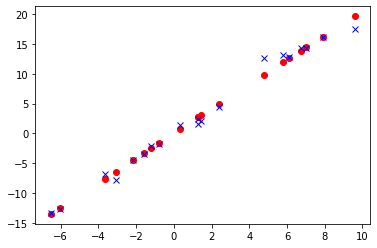

In [15]:
plt.plot(x.numpy(),y_pred.detach().numpy(),'ro')
plt.plot(x.numpy(),y,'bx')

In [ ]:
y